# Logical Regression Model

In [84]:
import pandas as pd
from sklearn.datasets import load_iris

In [85]:
# Loading Iris dataset
iris = load_iris()

X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target

In [86]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Print the first few samples in the datasetprint("First 5 samples:")
for i in range(5):
    print(f"Sample {i+1}: {X[i]} (Class: {y[i]}, Species: {iris.target_names[y[i]]})")



Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 21)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression


In [91]:
log_reg = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [92]:
log_reg.predict(X_train)

array([0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1])

In [93]:

log_reg.score(X_train, y_train)

0.9809523809523809

In [94]:

log_reg.score(X_test, y_test)

0.9333333333333333

In [95]:
test_accuracy = log_reg.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 93.33%


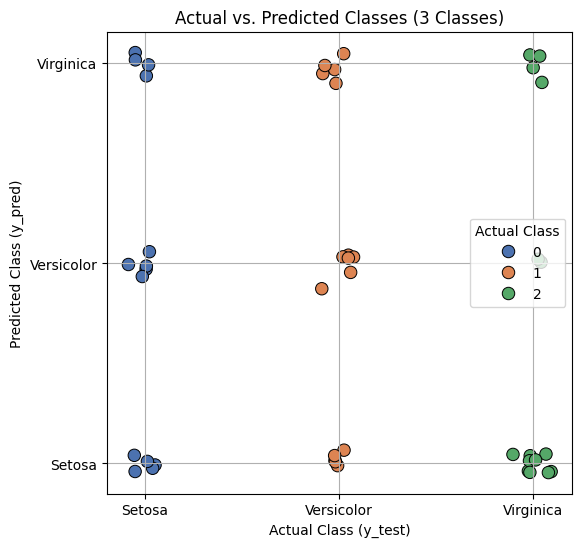

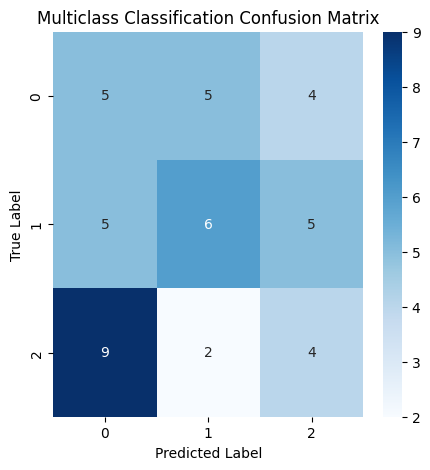

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adding jitter to avoid overlapping points
y_test_jittered = np.random.normal(y_test, 0.05)  
y_pred_jittered = np.random.normal(y_pred, 0.05)

plt.figure(figsize=(6, 6))

sns.scatterplot(x=y_test_jittered, y=y_pred_jittered, hue=y_test, palette="deep", s=80, edgecolor="black")

plt.xlabel("Actual Class (y_test)")
plt.ylabel("Predicted Class (y_pred)")
plt.title("Actual vs. Predicted Classes (3 Classes)")
plt.xticks([0, 1, 2], ["Setosa", "Versicolor", "Virginica"])
plt.yticks([0, 1, 2], ["Setosa", "Versicolor", "Virginica"])
plt.legend(title="Actual Class")
plt.grid()
plt.show()



cm_multi = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_multi, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Multiclass Classification Confusion Matrix")
plt.show()


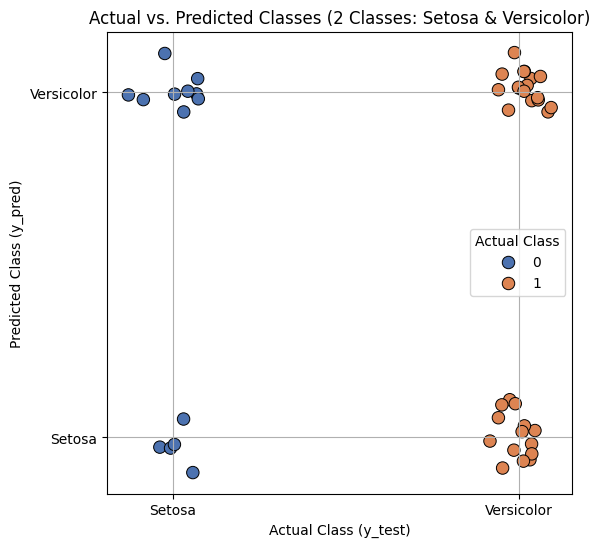

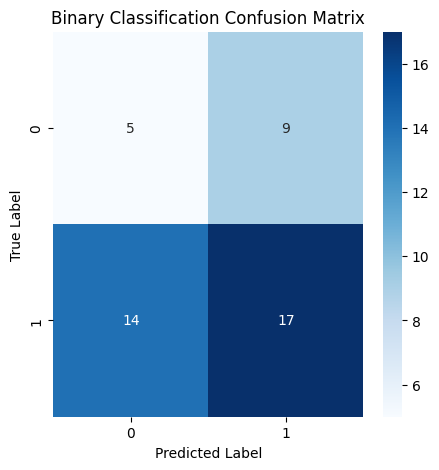

In [97]:
#Iris data has 3 classes but the point of logical regression is to get 2 outputs so counting Versicolor and Virginica as one 

y_test_merged = np.where(y_test == 2, 1, y_test)
y_pred_merged = np.where(y_pred == 2, 1, y_pred)

# Select only classes 0 and 1
mask = (y_test_merged == 0) | (y_test_merged == 1)
y_test_2 = y_test_merged[mask]
y_pred_2 = y_pred_merged[mask]

# to avoid overlapping points
y_test_jittered_2 = np.random.normal(y_test_2, 0.05)  
y_pred_jittered_2 = np.random.normal(y_pred_2, 0.05)

plt.figure(figsize=(6, 6))

sns.scatterplot(x=y_test_jittered_2, y=y_pred_jittered_2, hue=y_test_2, palette="deep", s=80, edgecolor="black")

plt.xlabel("Actual Class (y_test)")
plt.ylabel("Predicted Class (y_pred)")
plt.title("Actual vs. Predicted Classes (2 Classes: Setosa & Versicolor)")
plt.xticks([0, 1], ["Setosa", "Versicolor"])
plt.yticks([0, 1], ["Setosa", "Versicolor"])
plt.legend(title="Actual Class")
plt.grid()
plt.show()




cm_binary = confusion_matrix(y_test_2, y_pred_2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Binary Classification Confusion Matrix")
plt.show()


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for 2 classes

r2 = r2_score(y_test_2, y_pred_2)
mse = mean_squared_error(y_test_2, y_pred_2)
mae = mean_absolute_error(y_test_2, y_pred_2)
intercept = log_reg.intercept_

# Printing the values
print ("R2 Score: ", r2)   # variance
print("MSE: ", mse)
print("Mae: ", mae)
print("Intercept: " , intercept)

R2 Score:  -1.3847926267281108
MSE:  0.5111111111111111
Mae:  0.5111111111111111
Intercept:  [-0.09244733  1.79853767 -1.70609034]


In [99]:

#for 3 classes

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = log_reg.intercept_

# Printing the values
print ("R2 Score: ", r2)   # variance
print("MSE: ", mse)
print("Mae: ", mae)
print("Intercept: " , intercept)

R2 Score:  -1.3811349693251533
MSE:  1.5333333333333334
Mae:  0.9555555555555556
Intercept:  [-0.09244733  1.79853767 -1.70609034]
